In [10]:
import numpy as np
from qutip import*
sqrt = np.sqrt
pi   = np.pi
import Chalmers_Simulator_mesolve as CS
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle

In [88]:
Nqubits= 2
Nlevels= 3
Paulis_gt = 2.00e-8
CZ_gt = 2.50e-7
Diss = [35.98e-6, 36.24e-6]
Deph = [38.74e-6, 39.34e-6]
Alpha = -2*pi*250e6
ZZ_list = [[0,1]]
ZZ_strength = [2*pi*100e3]
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, 0, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

Sz = Qobj(np.array(np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])))
Sx = Qobj(np.array(np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])))
Un = qeye(3)

# Calculating the cost function
H1=  -1.0537076071291114*  tensor(Un,  Un)
H2=  0.3939836794385142*   tensor(Un,  Sz)
H3= -0.3939836794385142*   tensor(Sz,  Un)
H4= -0.011236585233181995* tensor(Sz,  Sz)
H5=  0.181288808211496*    tensor(Sx,  Sx)
cost_function= H1 + H2 + H3 + H4 + H5

Theta_range= np.linspace(0,2*pi,50)
state=[]
cost=[]
Ini = tensor(basis(3,0), basis(3,0))

In [89]:
CF00 = [0.968, 0.020, 0.011, 0.000]
CF01 = [0.059, 0.930, 0.010, 0.011]
CF10 = [0.059, 0.001, 0.921, 0.019]
CF11 = [0.040, 0.057, 0.056, 0.884]
CM = Qobj([CF00, CF01, CF10, CF11])

In [90]:
coeff = [-1.0537076071291114, 0.3939836794385142, -0.3939836794385142, \
         -0.011236585233181995, 0.181288808211496]
cost = []
for i, theta in enumerate(Theta_range):
    
    gate=[]
    gate.append(Add_gate(name=["PX" , "HD"], Tar_Con=[0,1],   angle=[pi, 0]           ))
    gate.append(Add_gate(name=["PX" , "PZ"], Tar_Con=[0,1],   angle=[pi/2, theta]     ))
    gate.append(Add_gate(name=["HD"       ], Tar_Con=[1],     angle=[0]               ))
    gate.append(Add_gate(name=["CZ"       ], Tar_Con=[[0,1]], angle=[0]               ))
    gate.append(Add_gate(name=["PX"       ], Tar_Con=[0],     angle=[-pi/2]           ))
    fstate = CS.Execute(Hamiltonian, c_ops, gate, Ini)    
    
    # Measurment part begins
    gate=[]
    gate.append(Add_gate(name=["U" , "U"],  Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["U" , "PZ"], Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["PZ" , "U"], Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["PZ" , "PZ"],Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["PY" , "PY"],Tar_Con=[0,1],   angle=[-pi/2, -pi/2]     ))
    cost.append(np.sum(np.real(CS.Measurement(Hamiltonian, fstate, gate, CM, coeff))))
    if np.mod(i+1, 10) == 0:
        print(i+1, 'of', len(Theta_range), 'completed')

10 of 50 completed
20 of 50 completed
30 of 50 completed
40 of 50 completed
50 of 50 completed


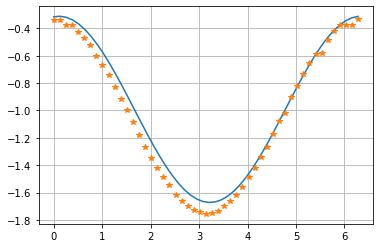

In [91]:
import matplotlib.pyplot as plt
plt.plot(Theta_range, cost)


import pickle
with open('Cost_func_expt','rb') as read_file:
    expt = pickle.load(read_file)
theta_expt = np.linspace(0,2*pi,len(expt))

plt.plot(theta_expt, expt,'*')
plt.grid('on')